In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
train_data=pd.read_csv("/content/fraudTrain.csv")
test_data=pd.read_csv("/content/fraudTest.csv")


In [12]:
train_data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [13]:
test_data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [14]:
df=pd.concat([train_data,test_data])


In [15]:
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1102209 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1102209 non-null  int64  
 1   trans_date_trans_time  1102209 non-null  object 
 2   cc_num                 1102209 non-null  int64  
 3   merchant               1102209 non-null  object 
 4   category               1102209 non-null  object 
 5   amt                    1102209 non-null  float64
 6   first                  1102209 non-null  object 
 7   last                   1102209 non-null  object 
 8   gender                 1102209 non-null  object 
 9   street                 1102209 non-null  object 
 10  city                   1102209 non-null  object 
 11  state                  1102209 non-null  object 
 12  zip                    1102209 non-null  int64  
 13  lat                    1102209 non-null  float64
 14  long                   1

In [17]:
df.columns


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [18]:
df.duplicated().sum()


0

In [19]:
df.isna().sum()


,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


546490
1102206


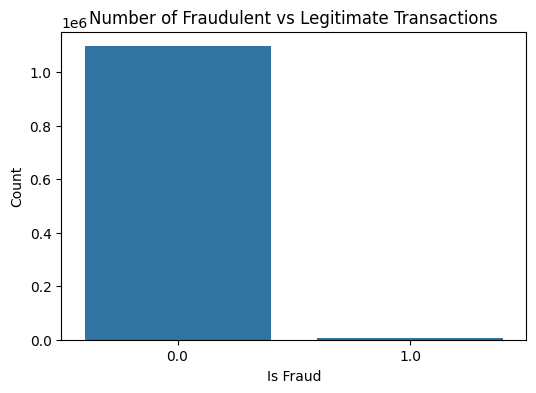

In [21]:
# Check for duplicates in the index of the 'is_fraud' column
print(df['is_fraud'].index.duplicated().sum())

# If duplicates are found in the index, reset the index:
df = df.reset_index(drop=True)

# Check for duplicates in the 'is_fraud' column itself
print(df['is_fraud'].duplicated().sum()) # This will check if the values in column itself have duplicates not the index

# Replot after making these changes
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.title('Number of Fraudulent vs Legitimate Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

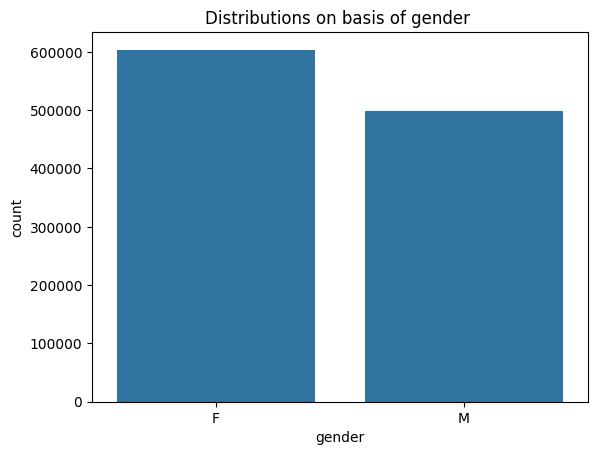

In [22]:
sns.countplot(x='gender',data=df)
plt.title("Distributions on basis of gender ")
plt.xticks
plt.show()

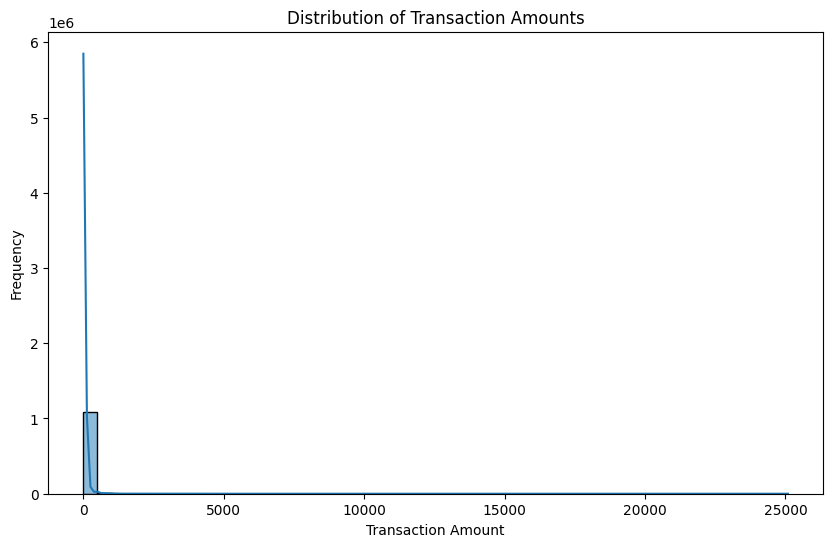

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

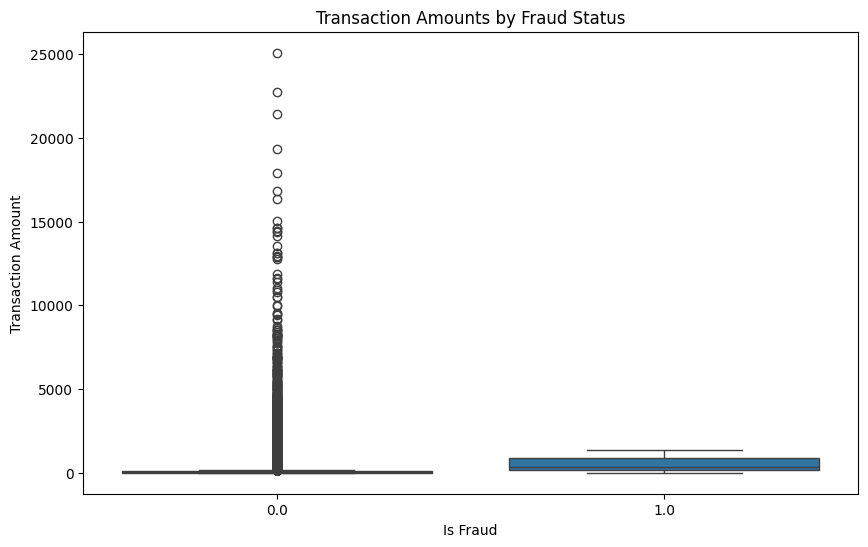

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

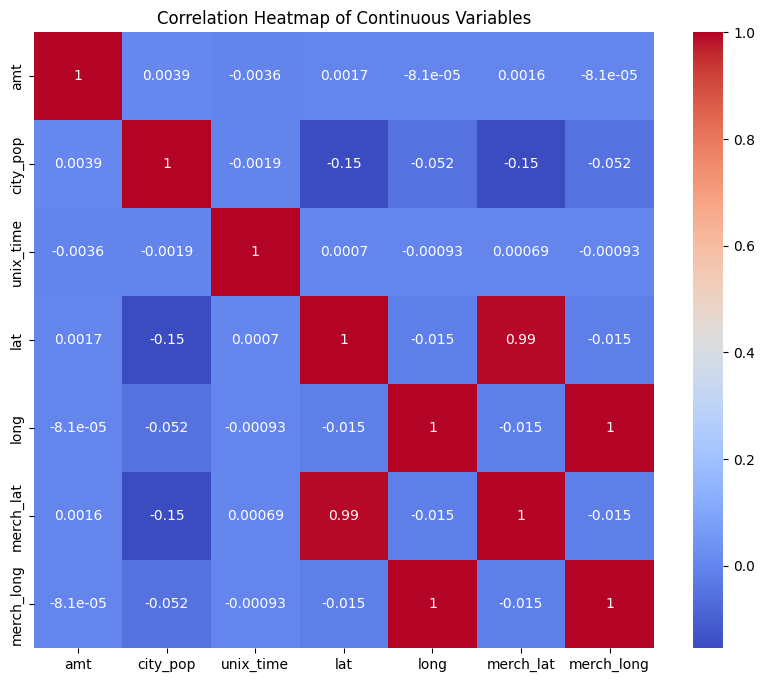

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['amt', 'city_pop', 'unix_time', 'lat', 'long', 'merch_lat', 'merch_long']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

In [26]:
df["merchant"].value_counts().sum()


1102209

In [27]:
df["gender"].unique()


array(['F', 'M'], dtype=object)

In [28]:
df["is_fraud"].value_counts()


,count
is_fraud,
0.0,1096853
1.0,5355


In [29]:
df["category"].value_counts()


,count
category,
gas_transport,111978
grocery_pos,104831
home,104123
shopping_pos,98964
kids_pets,96226
shopping_net,82741
entertainment,79787
food_dining,77887
personal_care,77650


In [30]:
df.columns


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [31]:
df=df.drop(['Unnamed: 0','trans_date_trans_time','cc_num',"merchant","category","first","last","gender","street","city","state","job","dob","trans_num"],axis=1)

In [32]:
x=df[['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long']]
y=df['is_fraud']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [40]:
!pip install scikit-learn
from sklearn.impute import SimpleImputer
import numpy as np # Import numpy for np.isnan
import pandas as pd # Import pandas for DataFrame operations

# ... (your existing code for data loading, splitting, and feature scaling) ...

# Impute missing values in y_train and y_test (if any)
imputer_y = SimpleImputer(strategy='most_frequent')  # Use 'most_frequent' for categorical target
# Access the NumPy array using .values before reshaping
y_train = imputer_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = imputer_y.transform(y_test.values.reshape(-1, 1))
y_train = y_train.ravel() # Flatten back to original shape
y_test = y_test.ravel() # Flatten back to original shape


# -- your existing Logistic Regression code --
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
ŷ_train=lr.predict(x_train)
ŷ_test=lr.predict(x_test)
print("test_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))

test_accuracy 0.9947593865499617
test_accuracy 0.9947922809627929


In [41]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="gini")
dt.fit(x_train,y_train)
ŷ_train=dt.predict(x_train)
ŷ_test=dt.predict(x_test)
print("test_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("cross_validation",cross_val_score(lr,x_train,y_train,cv=5).mean())

test_accuracy 1.0
test_accuracy 0.9942796744721968
cross_validation 0.9947571185429499
